In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
ratings = pd.read_csv('ratings.dat',sep='::',header=None)
movies = pd.read_csv('movies.dat',sep='::',header=None)
users = pd.read_csv('users.dat',sep='::',header=None)

In [3]:
ratings.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
users.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
movies.columns = ['MovieID','Title','Genres']
ratings.columns = ['UserID','MovieID','Rating','Timestamp']
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']

In [7]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
p = list(users.Occupation.unique())
p.sort()
p

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [11]:
users['Occupation'] = users['Occupation'].replace(to_replace=p,value=['other',"academic/educator","artist","clerical/admin",\
                                                                      "college/grad student","customer service","doctor/health care",\
                                                                     "executive/managerial","farmer","homemaker","K-12 student",\
                                                                     "lawyer","programmer","retired", "sales/marketing",\
                                                                     "scientist", "self-employed","technician/engineer",\
                                                                     "tradesman/craftsman","unemployed","writer"])

In [12]:
'''Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation
Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
'''
Master_data = pd.merge(left=movies,right=ratings,on='MovieID')
Master_data = pd.merge(left=Master_data,right=users,on='UserID')

In [13]:
Master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,K-12 student,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,K-12 student,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,K-12 student,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,K-12 student,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,K-12 student,48067


In [14]:
age = list(Master_data.Age.unique())
age.sort()
Master_data['Age Range'] = Master_data['Age'].replace(to_replace=age,value=["Under 18","18-24","25-34","35-44",\
                                                                               "45-49","50-55","56+"]) 

In [15]:
Master_data.shape

(1000209, 11)

In [16]:
Master_data.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Age Range     0
dtype: int64

# EXPLORATORY DATA ANALYSIS

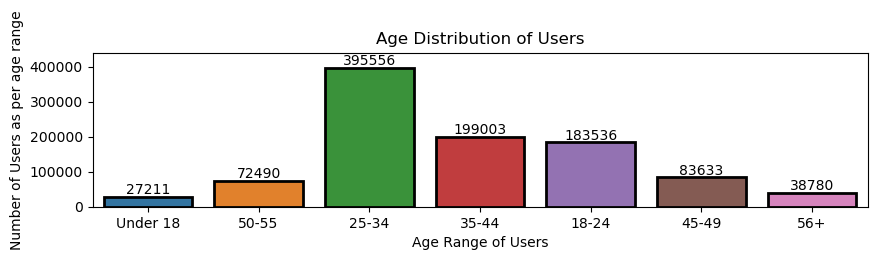

In [17]:
# User Age Distribution
fig,ax = plt.subplots(figsize=(10,2))
Plot = sns.countplot(data = Master_data,x='Age Range',ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.ylim(0,440000)
plt.xlabel('Age Range of Users')
plt.ylabel('Number of Users as per age range')
plt.title('Age Distribution of Users')
plt.show()

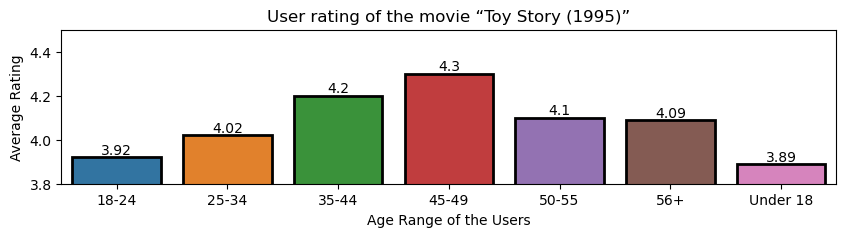

In [18]:
# User rating of the movie “Toy Story”
x = Master_data[Master_data['Title']=='Toy Story (1995)'].groupby('Age Range')['Rating'].mean().keys()
y = round(Master_data[Master_data['Title']=='Toy Story (1995)'].groupby('Age')['Rating'].mean(),2)
fig,ax = plt.subplots(figsize=(10,2))
Plot = sns.barplot(x,y,ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.ylim(3.8,4.5)
plt.xlabel('Age Range of the Users')
plt.ylabel('Average Rating')
plt.title('User rating of the movie “Toy Story (1995)”')
plt.show()

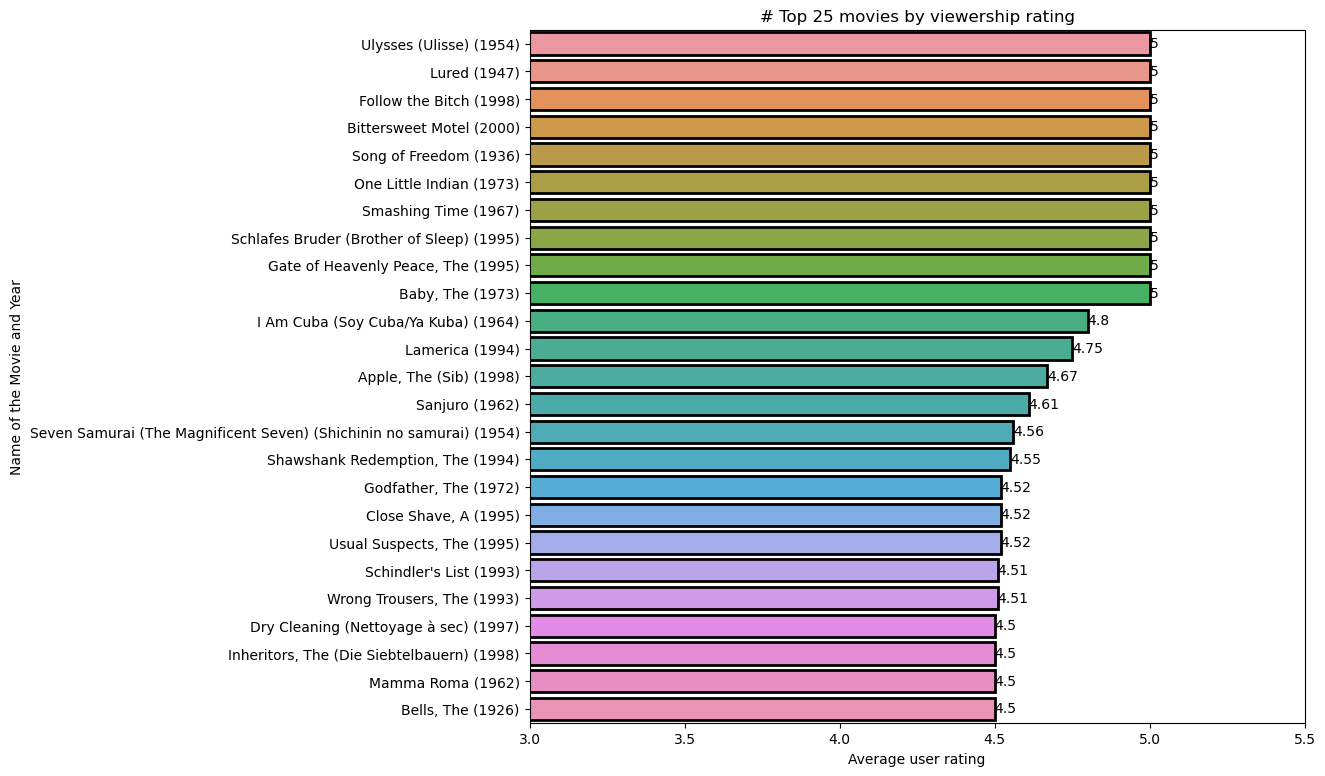

In [19]:
# Top 25 movies by viewership rating
x = round(Master_data.groupby('Title')['Rating'].mean().sort_values(ascending=False)[:25],2)
y = Master_data.groupby('Title')['Rating'].mean().sort_values(ascending=False)[:25].keys()
fig,ax = plt.subplots(figsize=(10,9))
Plot = sns.barplot(x,y,ax=ax,ec='k',lw=2,orient='h')
ax.bar_label(ax.containers[0])
plt.xlim(3,5.5)
plt.xlabel('Average user rating')
plt.ylabel('Name of the Movie and Year')
plt.title('# Top 25 movies by viewership rating')
plt.show()

In [20]:
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Master_data[Master_data['UserID']==2696][['Title','Rating','UserID']].sort_values(by='Rating',ascending=False)

,Title,Rating,UserID
991036,Lone Star (1996),5,2696
991045,"Devil's Advocate, The (1997)",4,2696
991047,Palmetto (1998),4,2696
991037,Basic Instinct (1992),4,2696
991053,"Talented Mr. Ripley, The (1999)",4,2696
991039,"Shining, The (1980)",4,2696
991051,Psycho (1998),4,2696
991049,"Perfect Murder, A (1998)",4,2696
991042,L.A. Confidential (1997),4,2696
991043,"Game, The (1997)",4,2696


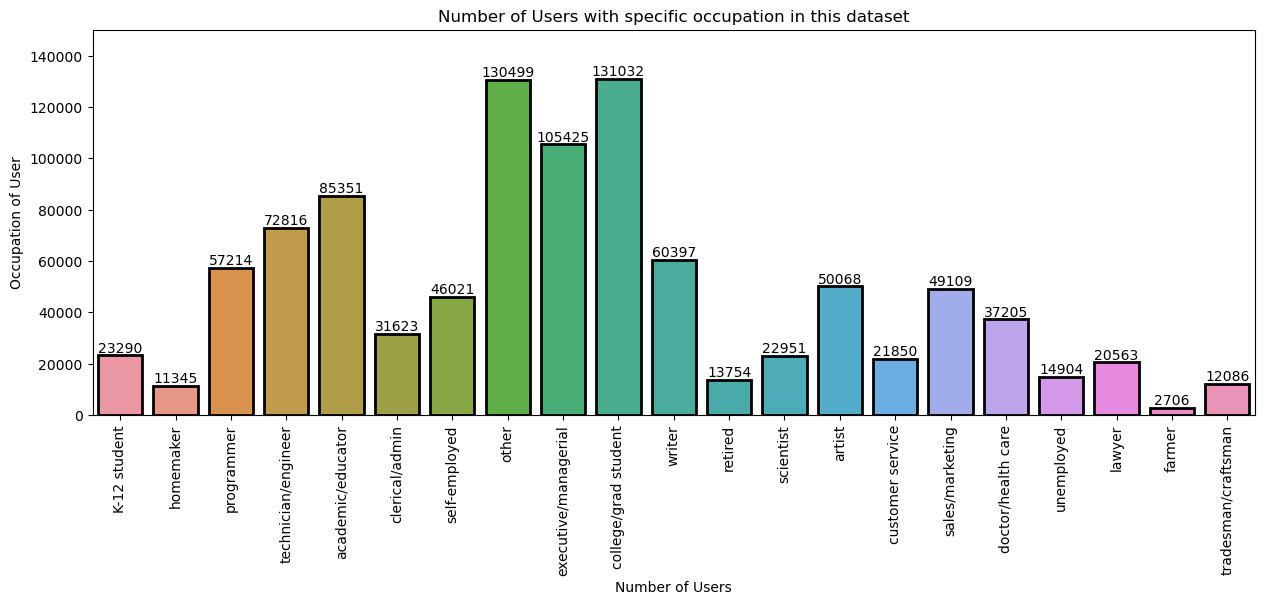

In [21]:
# Number of Users as per their Occupation
fig,ax = plt.subplots(figsize=(15,5))
Plot = sns.countplot(data=Master_data,x='Occupation',ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0],rotation=0)
plt.xticks(rotation=90)
plt.ylim(0,150000)
plt.xlabel('Number of Users')
plt.ylabel('Occupation of User')
plt.title('Number of Users with specific occupation in this dataset')
plt.show()

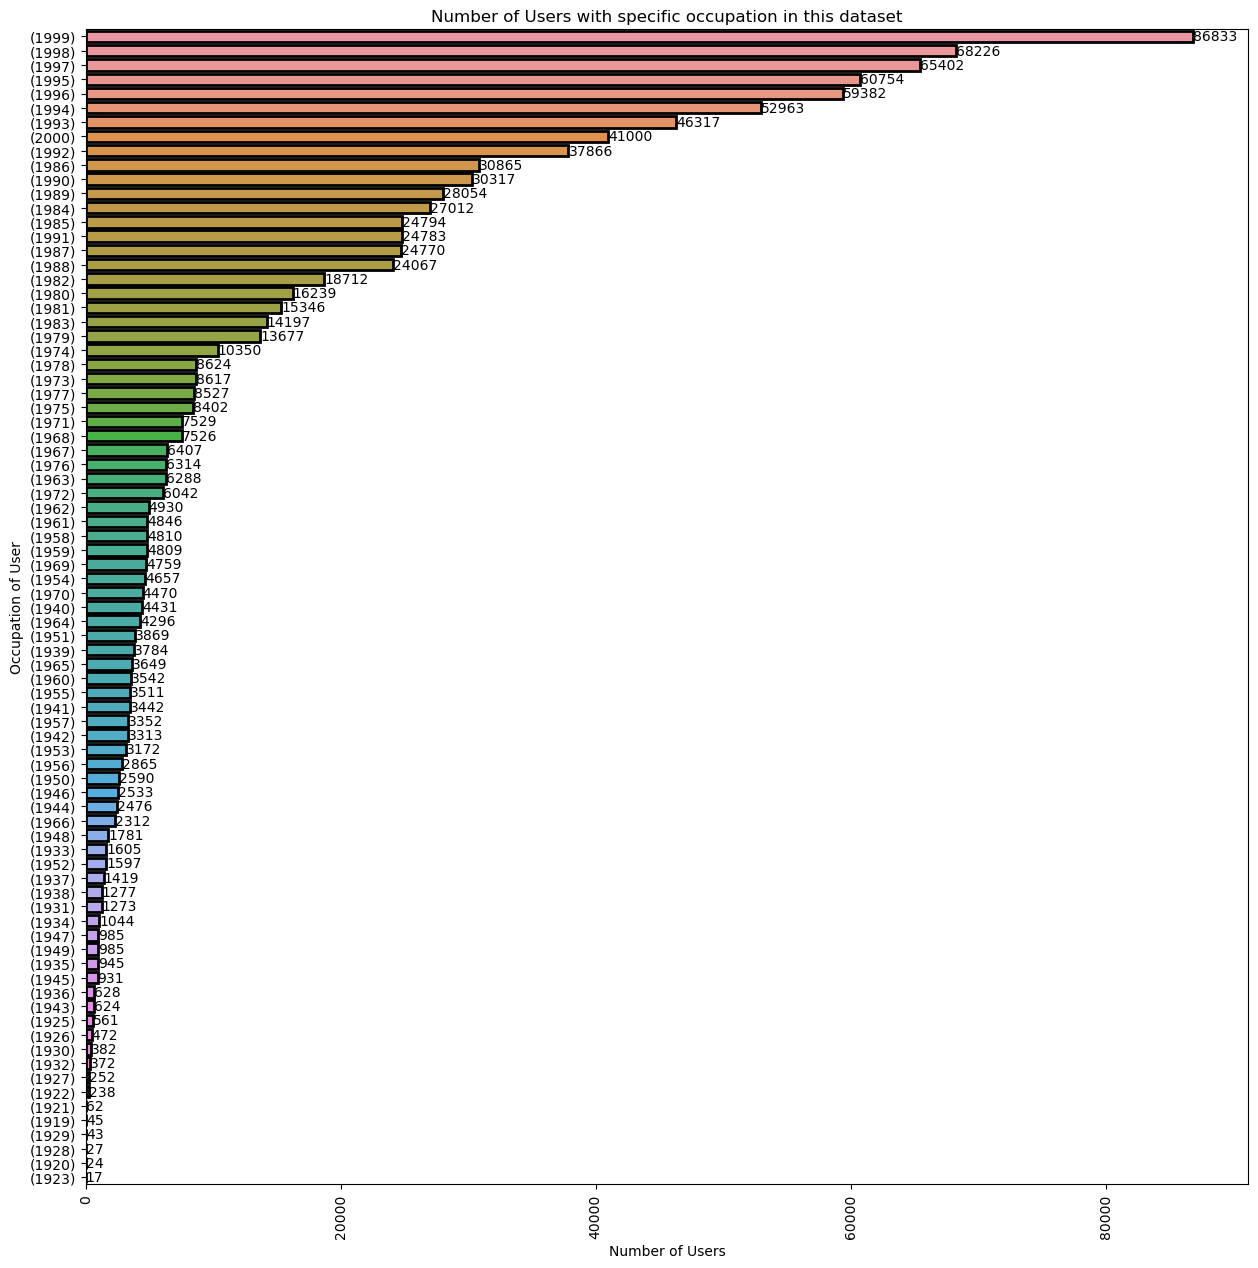

In [22]:
Master_data['Year'] = Master_data['Title'].apply(lambda x:x.split(' ')[-1])
Master_data.head()
fig,ax = plt.subplots(figsize=(15,15))
Plot = sns.countplot(data=Master_data,y='Year',ax=ax,ec='k',lw=2,order=Master_data['Year'].value_counts().index)
ax.bar_label(ax.containers[0],rotation=0)
plt.xticks(rotation=90)
# plt.ylim(0,150000)
plt.xlabel('Number of Users')
plt.ylabel('Occupation of User')
plt.title('Number of Users with specific occupation in this dataset')
plt.show()

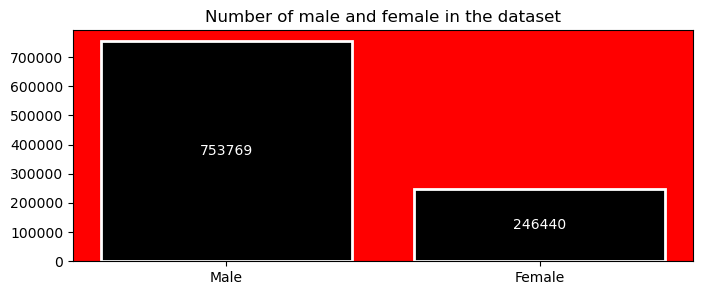

In [23]:
x = Master_data['Gender'].value_counts().keys()
y = Master_data['Gender'].value_counts()
plt.figure(figsize=(8,3))
ax = plt.axes()
ax.set_facecolor('r')
Gender = plt.bar(x,y,color='k',ec='w',lw=2)
plt.bar_label(Gender,labels=y,color='w',label_type='center',rotation=0)
plt.title('Number of male and female in the dataset')
plt.xticks(ticks = ['M','F'],labels=['Male','Female'])
plt.show()

# Feature Engineering:

In [24]:
'''Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to 
find out only the unique categories of genres)'''
Master_data.head()
Unique_genres = set()
Genre_list = []
def Genres(x):
    i = x.split('|')
    for a in i:
        Genre_list.append(a)

In [25]:
Master_data['Genres'].apply(Genres)
for i in Genre_list:
    Unique_genres.add(i)
print(Unique_genres)

{'Romance', 'Crime', 'Film-Noir', 'Horror', 'Western', 'Thriller', 'Drama', 'Sci-Fi', 'Action', 'Mystery', 'Comedy', 'Musical', 'Animation', 'Fantasy', 'Documentary', "Children's", 'War', 'Adventure'}


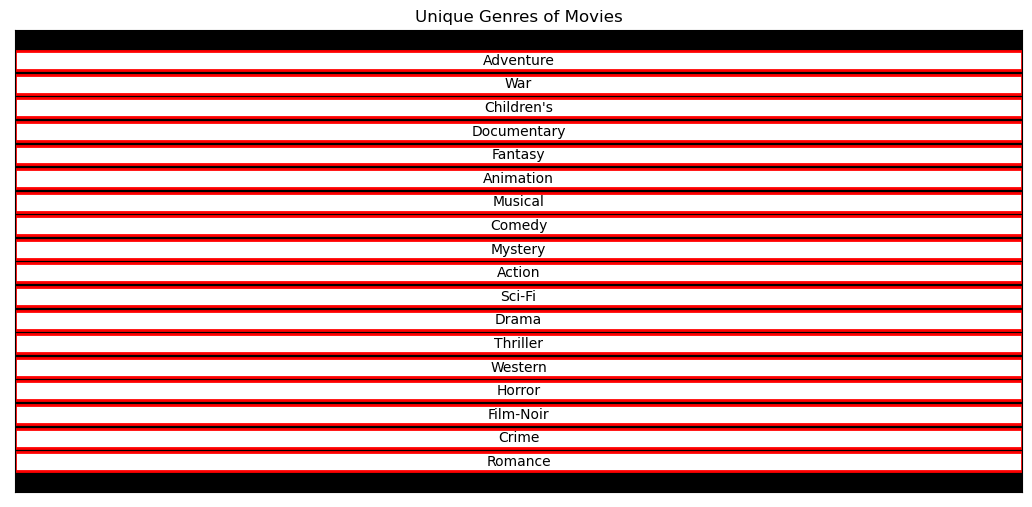

In [26]:
plt.figure(figsize=(13,6))
y = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ytick = list(range(1,20))
ax = plt.axes()
ax.set_facecolor('k')
Genres = plt.barh(list(Unique_genres),y,color='w',ec='r',lw=2)
plt.bar_label(Genres,labels=Unique_genres,color='k',label_type='center',rotation=0)
plt.xlim(0,1)
plt.title('Unique Genres of Movies')
plt.xticks([])
plt.yticks([])
# plt.axis('off')
plt.show()

In [27]:
'''Create a separate column for each genre category with a one-hot encoding ( 1 and 0) 
whether or not the movie belongs to that genre.'''
Genres = Master_data['Genres'].str.get_dummies(sep='|')
Master_data = pd.concat([Master_data,Genres],axis=1)
pd.set_option('display.max_columns',None)
Master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Age Range,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,K-12 student,48067,Under 18,(1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,K-12 student,48067,Under 18,(1995),0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,K-12 student,48067,Under 18,(1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,K-12 student,48067,Under 18,(1977),1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,K-12 student,48067,Under 18,(1993),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
